<a href="https://colab.research.google.com/github/vineet891/DL-Assignment/blob/vineet/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
#data preprocessing
x_train=x_train/255
x_test = x_test/255


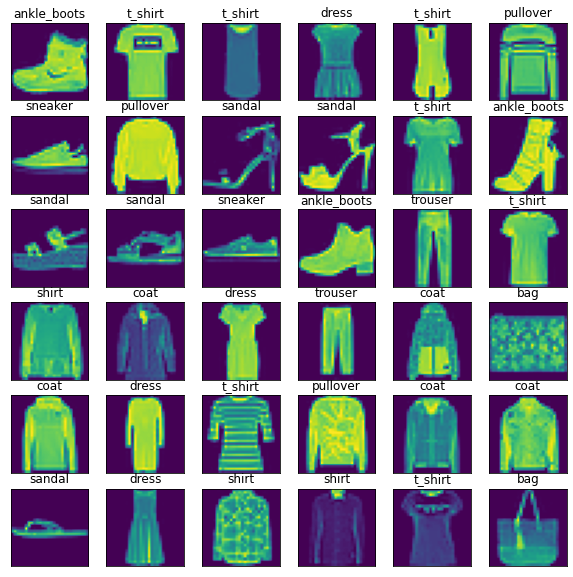

In [5]:
# train dataset datapoints
class_names = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [6]:
# one hot encoding the target variable
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [7]:
# validation split

X_valid, X_train = x_train[:5000], x_train[5000:]
Y_valid, Y_train = y_train[:5000], y_train[5000:]

# **MODEL 1**

In [14]:
# Model 1
"""
Hidden Layers =1
Number of hidden nodes in layer 1 = 128
Activation Function =Relu
Loss function = Categorical cross entropy

"""
model1 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model1.compile(optimizer='sgd',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
#train the model
history1 = model1.fit(x_train,y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7492 - accuracy: 0.7598
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5167 - accuracy: 0.8257
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4693 - accuracy: 0.8386
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4435 - accuracy: 0.8464
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4252 - accuracy: 0.8519
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4102 - accuracy: 0.8580
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3992 - accuracy: 0.8616
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3900 - accuracy: 0.8647
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3814 - accuracy: 0.8671
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.373

Text(0.5, 1.0, 'Train - Accuracy')

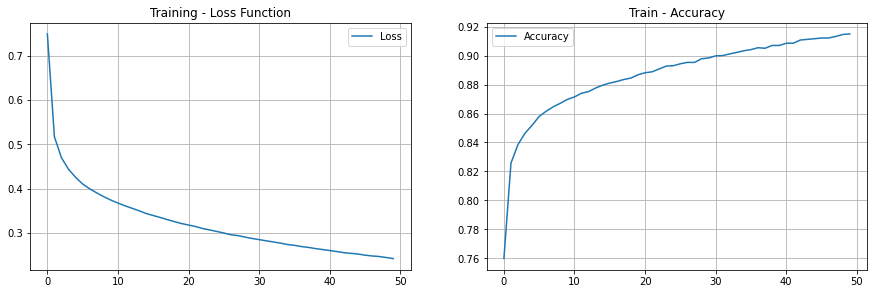

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history1.history['loss'], label='Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history1.history['accuracy'], label='Accuracy')
#plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [17]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8807


[0.33655962347984314, 0.8806999921798706]

# **MODEL 2**

In [ ]:
#model 2
"""

"""

# **MODEL 3**

In [ ]:
#model 3
"""

"""

# **MODEL 4**

In [ ]:
#model 4
"""

"""

# **MODEL 5**

In [19]:
# Model 5
"""
Hidden Layers =2
Number of hidden nodes in layers = 128, 64
Activation Function = Sigmoid
Loss function = KL Divergence

"""
model5 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128,activation='sigmoid'),
                                   tf.keras.layers.Dense(64,activation='sigmoid'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model5.compile(optimizer='sgd',
             loss= tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [23]:
#train the model
history5 = model5.fit(X_train,Y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1719/1719 [==============================] - 6s 3ms/step - loss: 2.0273 - accuracy: 0.4217 - val_loss: 1.6628 - val_accuracy: 0.5314
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 1.4038 - accuracy: 0.6230 - val_loss: 1.1844 - val_accuracy: 0.6736
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0695 - accuracy: 0.6702 - val_loss: 0.9598 - val_accuracy: 0.7060
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9009 - accuracy: 0.7059 - val_loss: 0.8325 - val_accuracy: 0.7308
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7979 - accuracy: 0.7291 - val_loss: 0.7504 - val_accuracy: 0.7462
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7306 - accuracy: 0.7425 - val_loss: 0.6948 - val_accuracy: 0.7610
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6846 - accuracy: 0.7545 - val_loss: 0.6555 - val_accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

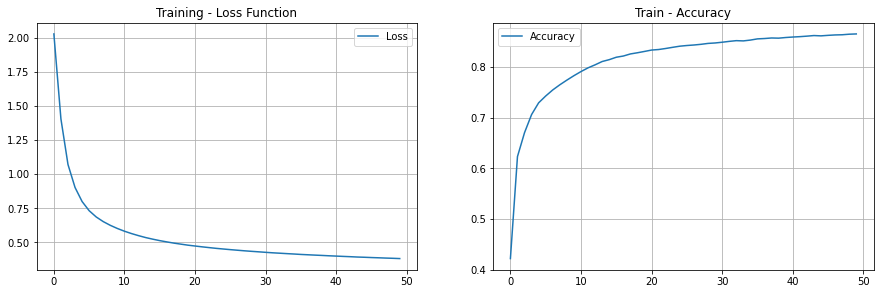

In [26]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history5.history['loss'], label='Loss')
#plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history5.history['accuracy'], label='Accuracy')
#plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [27]:
model5.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4190 - accuracy: 0.8510


[0.41903194785118103, 0.8510000109672546]

# **MODEL 6**

In [ ]:
#model 6
"""

"""

# **MODEL 7**

In [ ]:
#model 7
"""

"""

# **MODEL 8**

In [ ]:
#model 8
"""

"""

# **MODEL 9**

In [ ]:
#model 9
"""

"""

# **MODEL 10**

In [8]:
# Model 10
"""
Hidden Layers =5
Number of hidden nodes in layers =  512,256, 128, 64, 32
Activation Function = Sigmoid
Loss function = KL Divergence

"""
model10 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(512,activation='sigmoid'),
                                   tf.keras.layers.Dense(256,activation='sigmoid'),
                                   tf.keras.layers.Dense(128,activation='sigmoid'),
                                   tf.keras.layers.Dense(64,activation='sigmoid'),
                                   tf.keras.layers.Dense(32,activation='sigmoid'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model10.compile(optimizer='sgd',
             loss= tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3

In [9]:
#train the model
history10 = model10.fit(X_train,Y_train,epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3066 - accuracy: 0.1003 - val_loss: 2.3047 - val_accuracy: 0.0914
Epoch 2/50
1719/1719 [==============================] - 11s 6ms/step - loss: 2.3032 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 3/50
1719/1719 [==============================] - 11s 6ms/step - loss: 2.3031 - accuracy: 0.0998 - val_loss: 2.3034 - val_accuracy: 0.0970
Epoch 4/50
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.1007 - val_loss: 2.3029 - val_accuracy: 0.1084
Epoch 5/50
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3028 - accuracy: 0.1020 - val_loss: 2.3032 - val_accuracy: 0.1012
Epoch 6/50
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3025 - accuracy: 0.1022 - val_loss: 2.3031 - val_accuracy: 0.0986
Epoch 7/50
1719/1719 [==============================] - 11s 7ms/step - loss: 2.3023 - accuracy: 0.1048 - val_loss: 2.3020 - val_ac

Text(0.5, 1.0, 'Train - Accuracy')

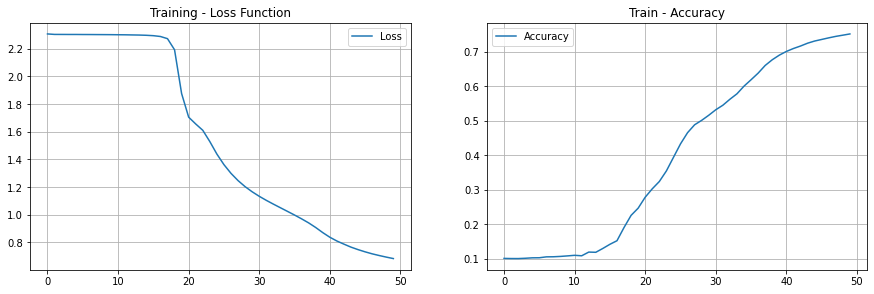

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history10.history['loss'], label='Loss')
#plt.plot(history10.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history10.history['accuracy'], label='Accuracy')
#plt.plot(history10.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [11]:
model10.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6949 - accuracy: 0.7488


[0.6949166655540466, 0.7487999796867371]

# **MODEL 11**

In [ ]:
#model 11
"""

"""

# **MODEL 12**

In [11]:
# Model 12
"""
Hidden Layers =7
Number of hidden nodes in layers =  512, 256, 256, 128, 64, 32, 16
Activation Function = relu
Loss function = KL Divergence

"""
model12 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(256,activation='relu'),
                                   tf.keras.layers.Dense(256,activation='relu'),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(64,activation='relu'),
                                   tf.keras.layers.Dense(32,activation='relu'),
                                   tf.keras.layers.Dense(16,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model12.compile(optimizer='sgd',
             loss= tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model12.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)               

In [12]:
#train the model
history12 = model12.fit(X_train,Y_train,epochs=18, validation_data=(X_valid, Y_valid))

Epoch 1/18
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9442 - accuracy: 0.6682 - val_loss: 0.5434 - val_accuracy: 0.8058
Epoch 2/18
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4969 - accuracy: 0.8202 - val_loss: 0.4322 - val_accuracy: 0.8462
Epoch 3/18
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4204 - accuracy: 0.8485 - val_loss: 0.3908 - val_accuracy: 0.8618
Epoch 4/18
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3792 - accuracy: 0.8619 - val_loss: 0.3608 - val_accuracy: 0.8732
Epoch 5/18
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3511 - accuracy: 0.8725 - val_loss: 0.3593 - val_accuracy: 0.8716
Epoch 6/18
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3324 - accuracy: 0.8772 - val_loss: 0.3640 - val_accuracy: 0.8722
Epoch 7/18
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3133 - accuracy: 0.8860 - val_loss: 0.3641 - val_ac

Text(0.5, 1.0, 'Train - Accuracy')

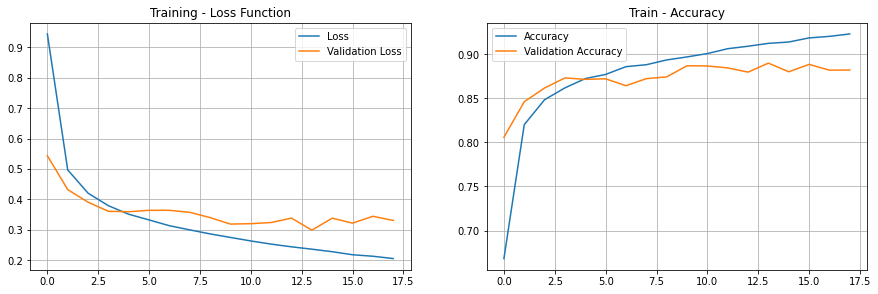

In [13]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history12.history['loss'], label='Loss')
plt.plot(history12.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history12.history['accuracy'], label='Accuracy')
plt.plot(history12.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [14]:
model12.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3537 - accuracy: 0.8814


[0.3537074625492096, 0.8813999891281128]

# **MODEL 13**

In [ ]:
#model 13
"""

"""

# **MODEL 14**

In [10]:
#model 14
"""
Hidden Layers =8
Number of hidden nodes in layers = 1024, 512, 256, 128, 128, 64, 32, 16
Activation Function = tanh
Loss function = KL Divergence

"""
model14 = tf.keras.models.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(1024,activation='tanh'),
                                   tf.keras.layers.Dense(512,activation='tanh'),
                                   tf.keras.layers.Dense(256,activation='tanh'),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(128,activation='tanh'),
                                   tf.keras.layers.Dense(64,activation='tanh'),
                                   tf.keras.layers.Dense(32,activation='tanh'),
                                   tf.keras.layers.Dense(16,activation='tanh'),
                                   tf.keras.layers.Dense(10,activation='softmax')
])


#define optimizer,loss function and evaluation metric
model14.compile(optimizer='sgd',
             loss=tf.keras.losses.kullback_leibler_divergence,
             metrics=['accuracy'])

model14.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 64)               

In [11]:
#train the model
history14 = model14.fit(x_train,y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7262 - accuracy: 0.7857
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4605 - accuracy: 0.8432
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4048 - accuracy: 0.8593
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3733 - accuracy: 0.8673
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3514 - accuracy: 0.8772
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3334 - accuracy: 0.8812
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3205 - accuracy: 0.8856
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3066 - accuracy: 0.8908
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2961 - accuracy: 0.8936
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.285

Text(0.5, 1.0, 'Train - Accuracy')

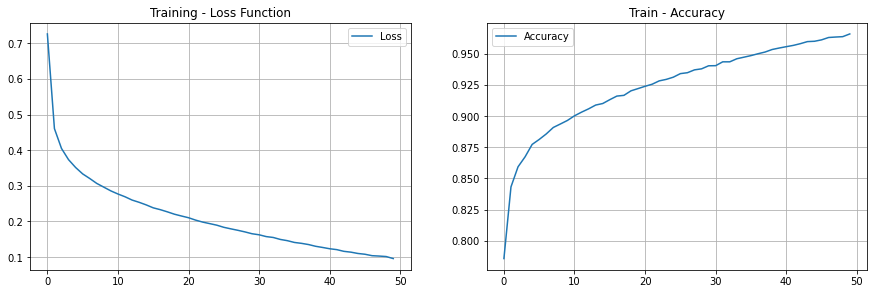

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(history14.history['loss'], label='Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(history14.history['accuracy'], label='Accuracy')
#plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [13]:
model14.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4064 - accuracy: 0.8845


[0.4063626229763031, 0.8845000267028809]

# **MODEL 15**

In [ ]:
#model 15
"""

"""

# **MODEL 16**

In [ ]:
#model 16
"""

"""